# CSC2515 Assignment #1
**Student Name: Alexis Bruneau** \
Student ID: 1008704270 \
Collaborated with: Ramy ElMallah, Anton Korikov \
Submitted to: Prof. Amir-massoud Farahmand


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
uploaded = files.upload()

Saving DNE_climate.csv to DNE_climate.csv
Saving exists_climate.csv to exists_climate.csv


In [ ]:
def load_data():
  DNE_climate = pd.read_csv("DNE_climate.csv", header=0)
  DNE_climate["label"] = 0 #"DNE"
  exists_climate = pd.read_csv("exists_climate.csv", header=0)
  exists_climate["label"] = 1 #"exists"
  corpus = pd.concat((exists_climate, DNE_climate))
  vectorizer = feature_extraction.text.CountVectorizer()
  tweets = corpus["tweet"].to_numpy()
  X = vectorizer.fit_transform(tweets)

  X = X.toarray()
  Y = corpus["label"].to_numpy()
  X_train, X_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=0.3)
  X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)
  return X_train, X_val, X_test, y_train, y_val, y_test, vectorizer.get_feature_names_out()


In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = load_data()

In [ ]:
def calculate_accuracy(X_val, y_val, model_predict_fn):
  y_pred = model_predict_fn(X_val)
  matches = [1 if val==pred else 0 for val, pred in zip(y_val, y_pred)]
  total_correct = sum(matches)
  total = len(y_val)
  return total_correct/total

In [ ]:
def select_tree_model(X_train, X_val, y_train, y_val):
  max_depths = [2, 5, 10, 15, 20]
  critera = ['gini', 'entropy']
  best_d = 0
  best_c = ''
  best_acc = 0
  best_model = None
  for d in max_depths:
    for c in critera:
      model_name = f"Critera={'Information Gain' if c=='entropy' else 'Gini Coefficient'}, Depth={d} model"
      classifier = DecisionTreeClassifier(criterion=c, max_depth=d)
      classifier.fit(X_train, y_train)
      y_pred = classifier.predict(X_val)

      acc = calculate_accuracy(X_val, y_val, classifier.predict)

      if acc > best_acc:
        best_d = d
        best_c = c
        best_acc = acc
        best_model = classifier
      print(f"{model_name:<45} Accuracy={acc*100:.2f}%")
  return best_model


In [ ]:
model = select_tree_model(X_train, X_val, y_train, y_val)

Critera=Gini Coefficient, Depth=2 model       Accuracy=75.48%
Critera=Information Gain, Depth=2 model       Accuracy=75.48%
Critera=Gini Coefficient, Depth=5 model       Accuracy=76.11%
Critera=Information Gain, Depth=5 model       Accuracy=76.59%
Critera=Gini Coefficient, Depth=10 model      Accuracy=77.55%
Critera=Information Gain, Depth=10 model      Accuracy=77.23%
Critera=Gini Coefficient, Depth=15 model      Accuracy=80.41%
Critera=Information Gain, Depth=15 model      Accuracy=80.73%
Critera=Gini Coefficient, Depth=20 model      Accuracy=80.10%
Critera=Information Gain, Depth=20 model      Accuracy=80.25%


In [ ]:
# Calculate accuracy on the test set
calculate_accuracy(X_test, y_test, model.predict)

0.7726550079491256

In [ ]:
!pip install graphviz
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


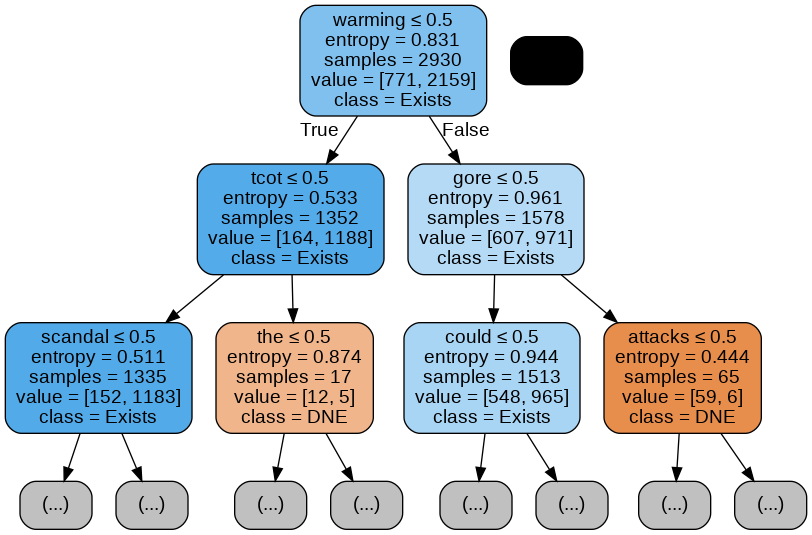

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True,
                feature_names = labels,
                class_names=['DNE','Exists'],
                max_depth=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cls.png')
Image(graph.create_png())


In [ ]:
import math
def calculate_entropy(data):
  counts = np.bincount(data)
  probabilities = counts / len(data)
  entropy = 0
  for prob in probabilities:
      if prob > 0:
          entropy += prob * math.log(prob, 2)
  return -1*entropy

def compute_information_gain(X_train, y_train, split_word):
  split_word = np.where(labels == split_word)[0][0]
  original_entropy = calculate_entropy(y_train)
  left_indices = [i for i, tweet in enumerate(X_train) if tweet[split_word] == 0]
  left_split = y_train[left_indices]
  right_indices = [i for i, tweet in enumerate(X_train) if tweet[split_word] >= 1]
  right_split = y_train[right_indices]
  new_entropy = 0
  for split in [left_split, right_split]:
      prob = len(split)/len(y_train)
      new_entropy += prob * calculate_entropy(split)
  return original_entropy-new_entropy

In [ ]:
import random
words = ["warming", "scam", "thought", "great", "disprove"]
for _ in range(10):
  words.append(random.choice(labels))
for word in words:
  print(f"{word:<20} IG: {compute_information_gain(X_train, y_train, word):.10f}")

warming              IG: 0.0677538939
scam                 IG: 0.0152455979
thought              IG: 0.0005817005
great                IG: 0.0048208123
disprove             IG: 0.0012047571
asui2d               IG: 0.0001503841
timecomhttp          IG: 0.0000000000
auizpz               IG: 0.0001503841
d31puxtt             IG: 0.0001503841
considers            IG: 0.0001503841
11n727               IG: 0.0001503841
loooooooooooooooooooooong IG: 0.0006576067
alumnus              IG: 0.0001503841
djovci               IG: 0.0000000000
free                 IG: 0.0004535568


In [ ]:
def select_knn_model(X_train, X_val, y_train, y_val):
  ks = range(1, 21)
  history = {"k":ks, "train": [], "val":[]}
  best_k = 0
  best_acc = 0
  best_model = None
  for k in ks:
    model_name = f"k={k} model"
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    acc = calculate_accuracy(X_val, y_val, classifier.predict)
    history["val"].append(1-acc)
    acc_train = calculate_accuracy(X_train, y_train, classifier.predict)
    history["train"].append(1-acc_train)
    if acc > best_acc:
      best_k = k
      best_acc = acc
      best_model = classifier
    print(f"{model_name:<10} Accuracy={acc*100:.2f}%")
  return best_model, history

In [ ]:
model, history = select_knn_model(X_train, X_val, y_train, y_val)

k=1 model  Accuracy=75.32%
k=2 model  Accuracy=67.52%
k=3 model  Accuracy=74.84%
k=4 model  Accuracy=74.84%
k=5 model  Accuracy=79.14%
k=6 model  Accuracy=78.18%
k=7 model  Accuracy=79.14%
k=8 model  Accuracy=77.39%
k=9 model  Accuracy=77.39%
k=10 model Accuracy=75.16%
k=11 model Accuracy=76.43%
k=12 model Accuracy=74.68%
k=13 model Accuracy=75.80%
k=14 model Accuracy=74.84%
k=15 model Accuracy=76.27%
k=16 model Accuracy=75.48%
k=17 model Accuracy=77.23%
k=18 model Accuracy=75.96%
k=19 model Accuracy=78.03%
k=20 model Accuracy=76.11%


In [ ]:
# Calculate accuracy on the test set
calculate_accuracy(X_test, y_test, model.predict)

0.7774244833068362

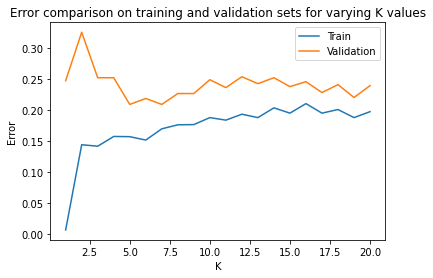

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history["k"], history["train"], label= "Train")
plt.plot(history["k"], history["val"], label= "Validation")
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Error comparison on training and validation sets for varying K values')
plt.legend()
